In [1]:
%config Completer.use_jedi = False

# Load wine data

In [2]:
import pandas as pd

In [3]:
wine = pd.read_csv('http://bit.ly/wine_csv_data')

In [4]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [6]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [10]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

print(data.shape)
print(target.shape)

(6497, 3)
(6497,)


# Split data

In [9]:
from sklearn.model_selection import train_test_split

In [11]:
train_input, test_input, train_target, test_target = train_test_split(data,
                                                                      target,
                                                                      test_size=0.2,
                                                                      random_state=42)

In [12]:
print(train_input.shape)
print(test_input.shape)

(5197, 3)
(1300, 3)


# Standardization

In [7]:
from sklearn.preprocessing import StandardScaler

In [20]:
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# Build a logistic regression model

In [15]:
from sklearn.linear_model import LogisticRegression

In [21]:
lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [17]:
print(lr.coef_)
print(lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]]
[1.81777902]


# Build a decision tree model

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

DecisionTreeClassifier(random_state=42)

In [23]:
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


# Visualize result

In [25]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

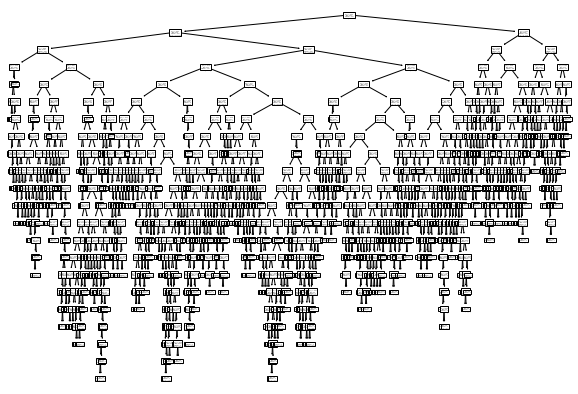

In [26]:
plt.figure(figsize=(10, 7))
plot_tree(dt)
plt.show()

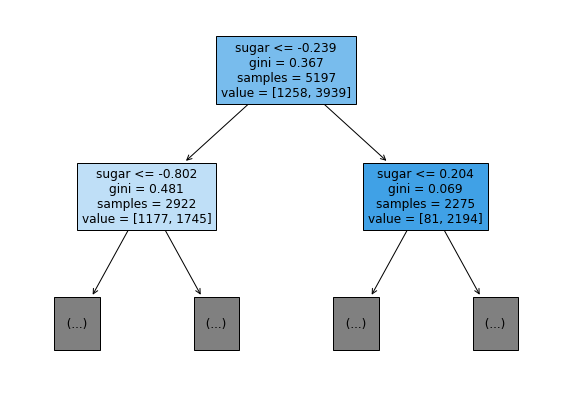

In [27]:
plt.figure(figsize=(10, 7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [28]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [29]:
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


# Visualize tree

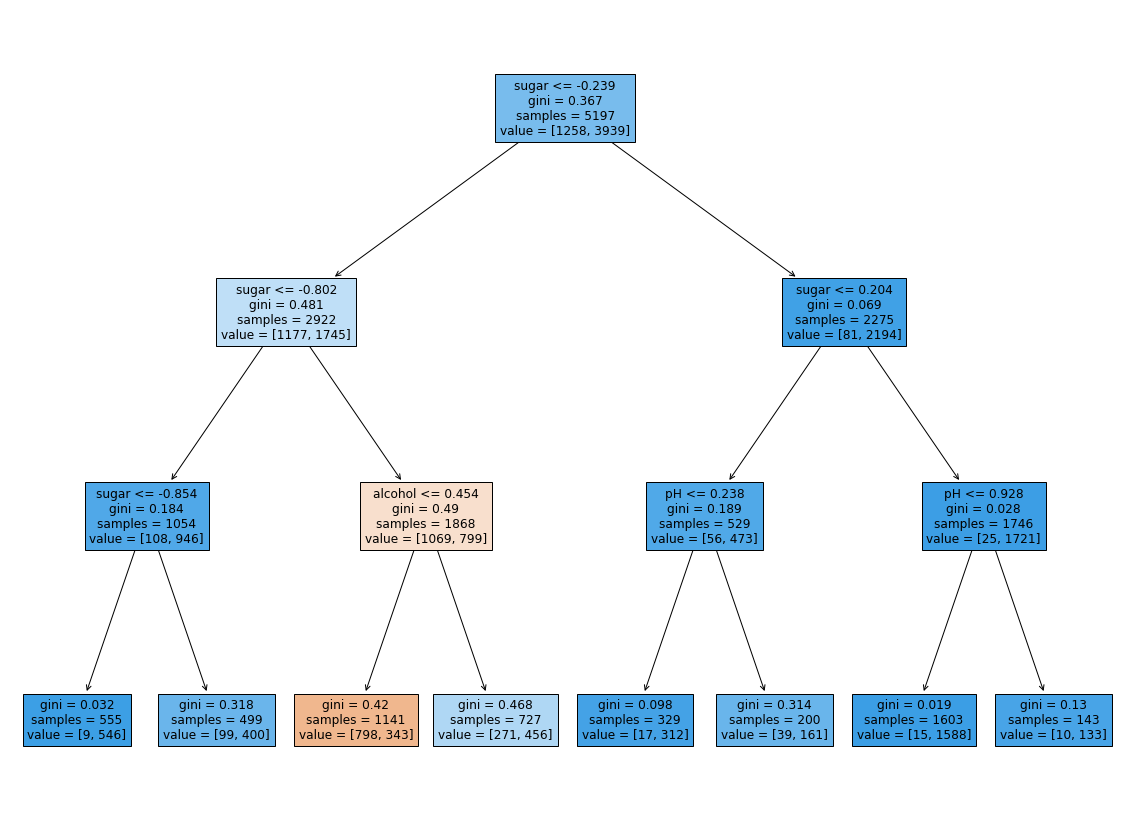

In [30]:
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [32]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [33]:
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


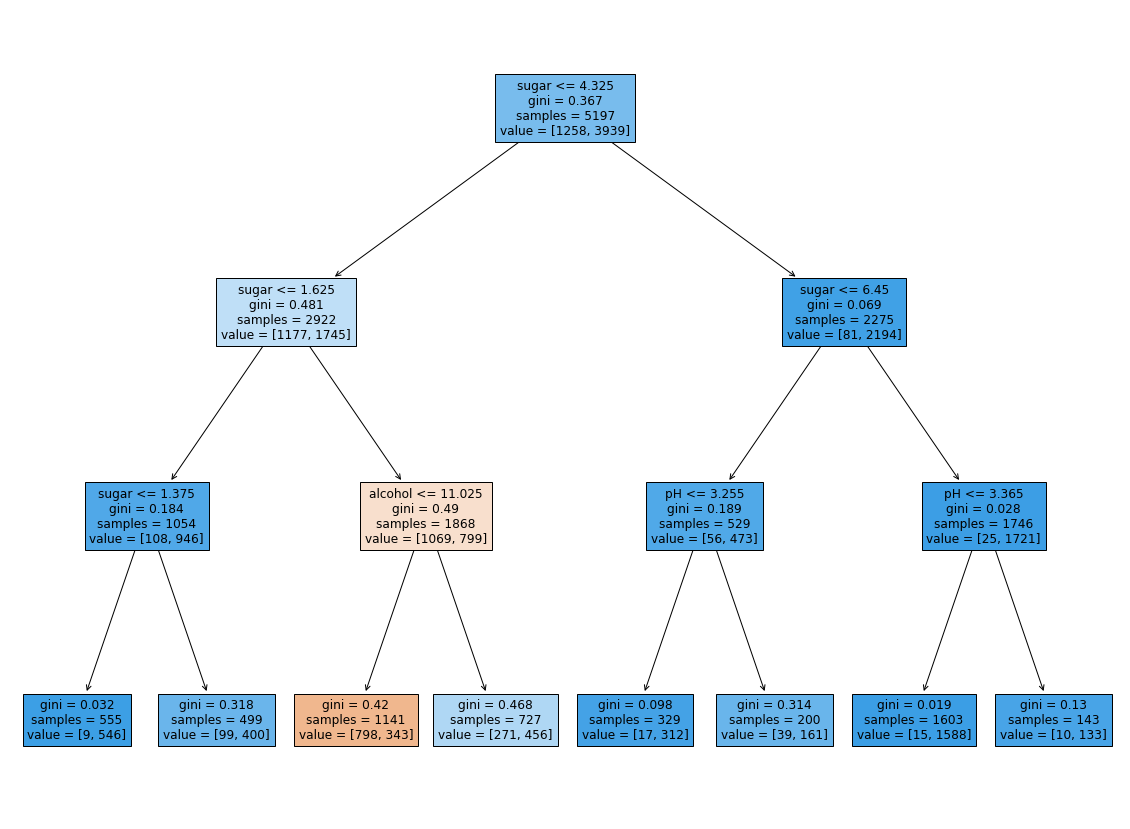

In [37]:
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [35]:
dt.feature_importances_

array([0.12345626, 0.86862934, 0.0079144 ])

# Application problem

In [38]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
dt.fit(train_input, train_target)

DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)

In [40]:
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8874350586877044
0.8615384615384616


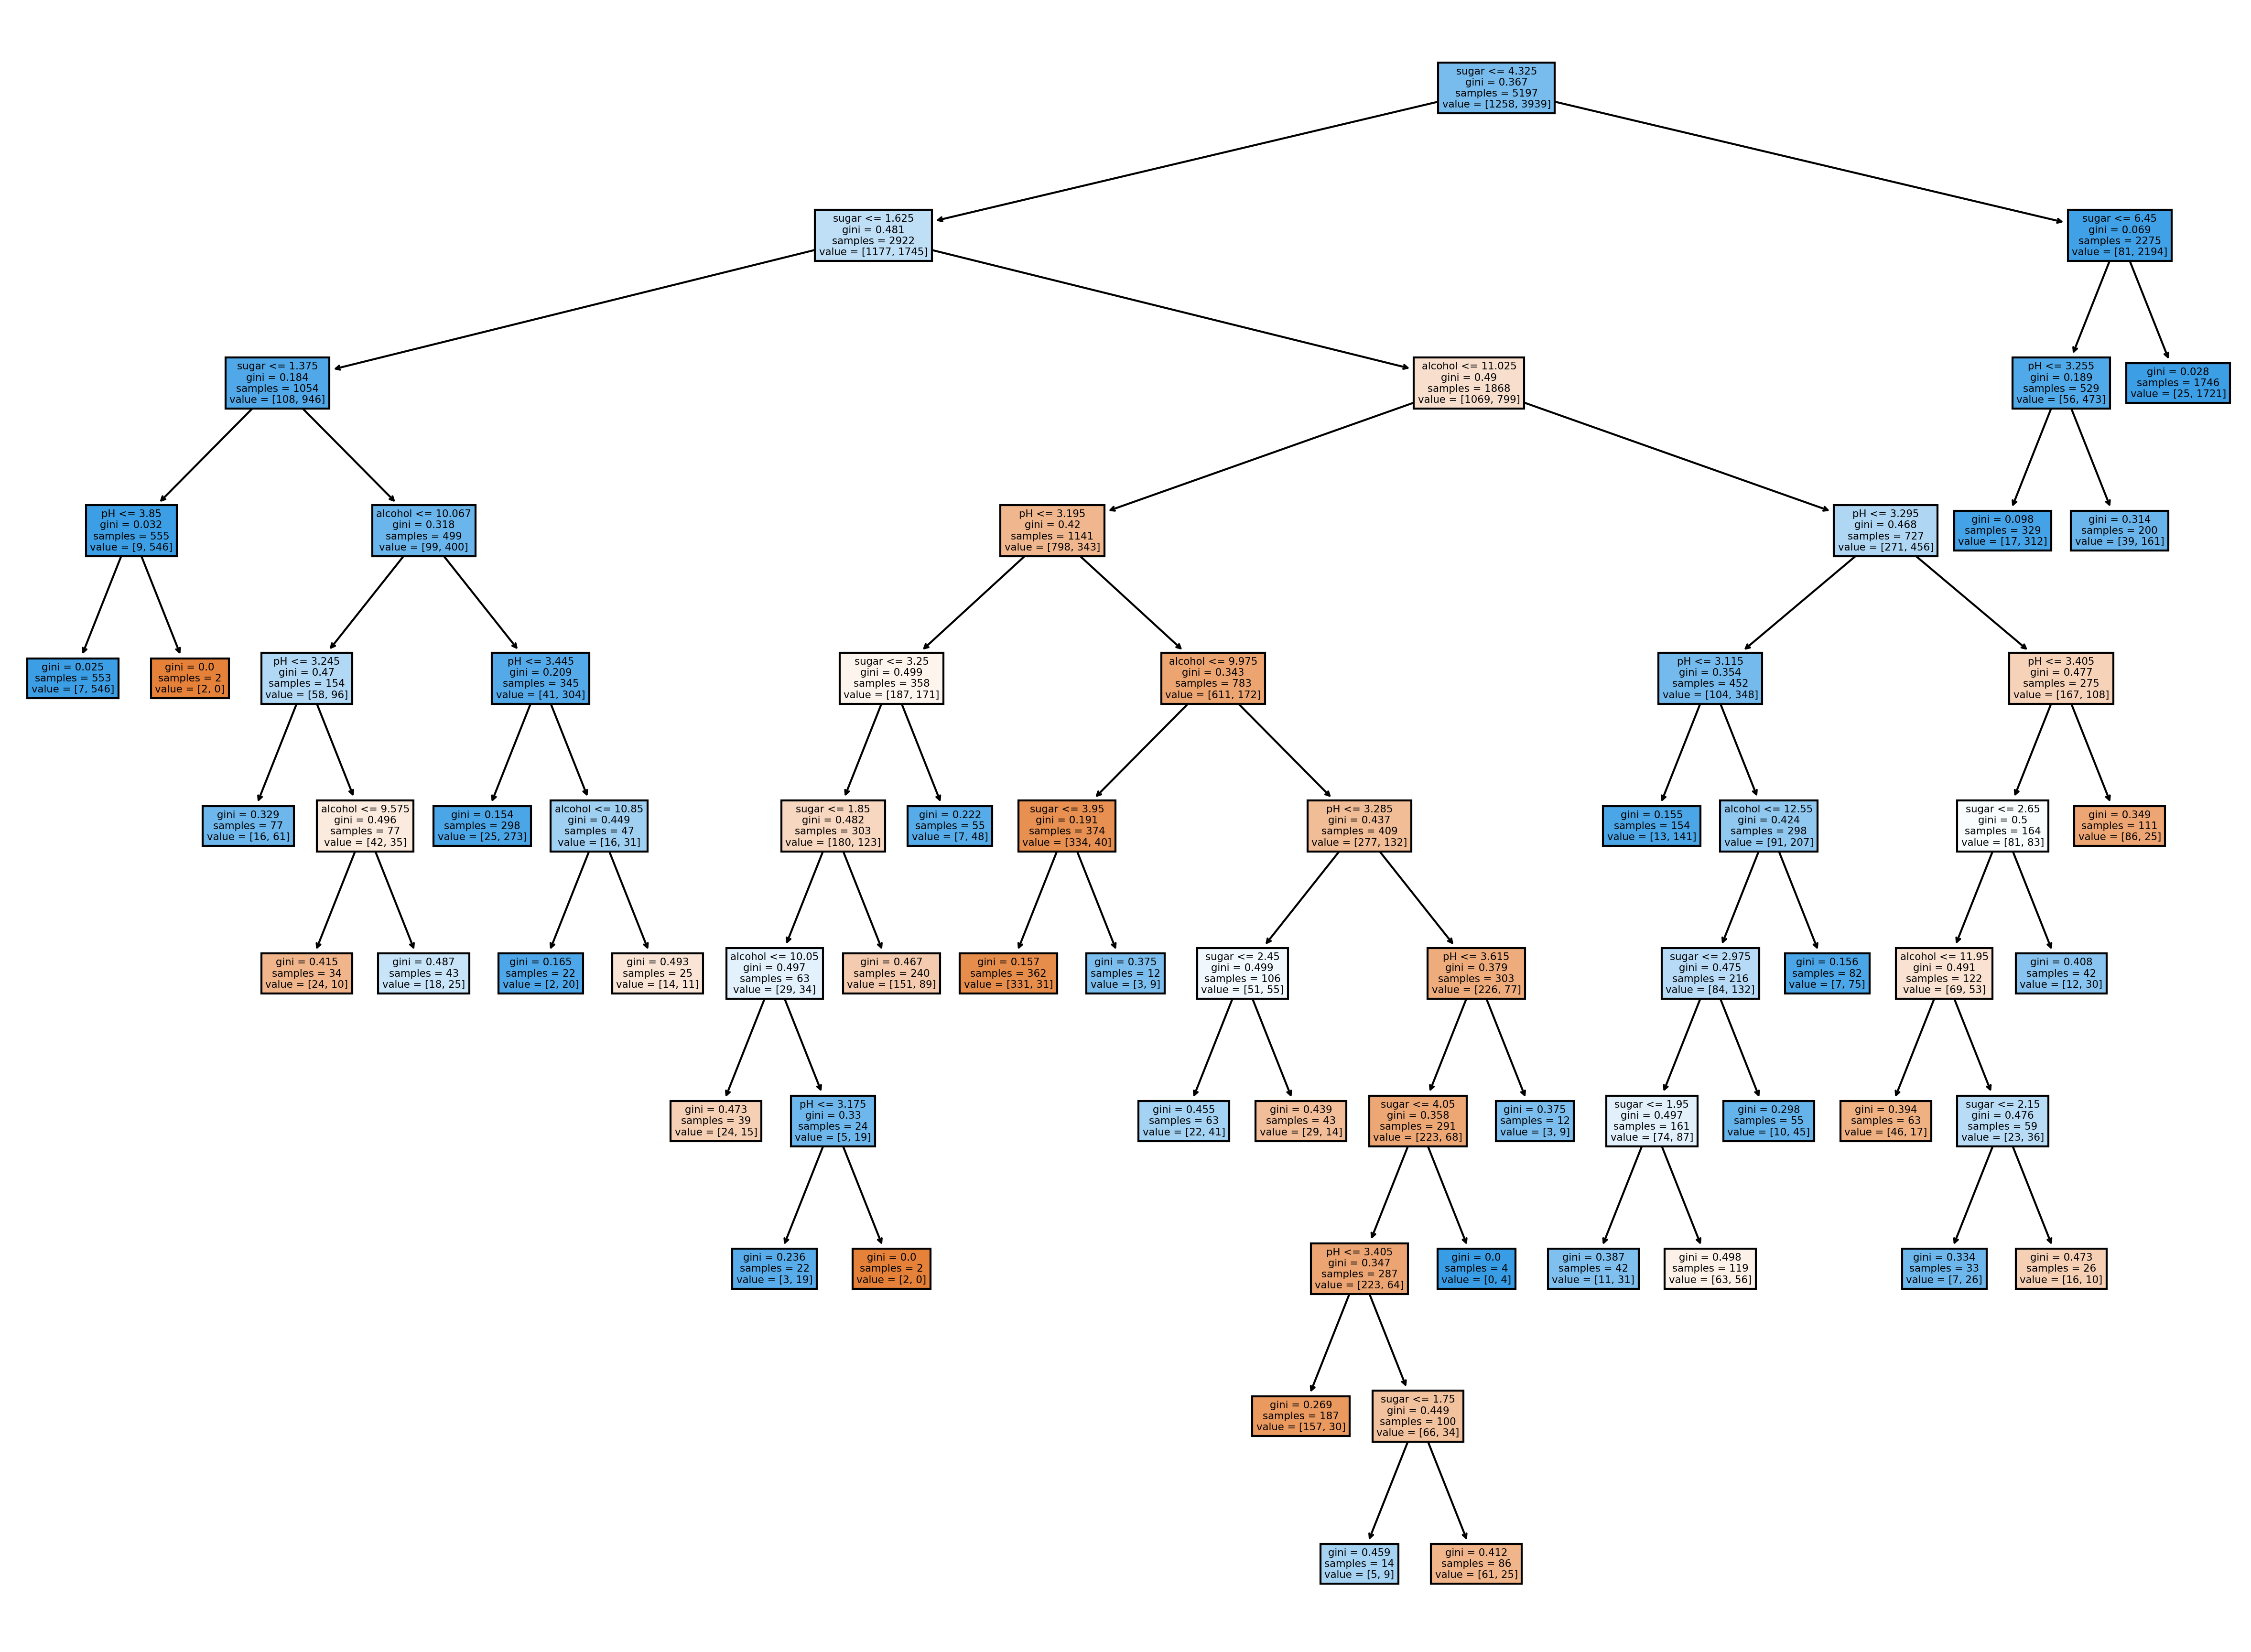

In [41]:
plt.figure(figsize=(20, 15), dpi=300)
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()